https://www.linkedin.com/pulse/extracting-your-fav-playlist-info-spotifys-api-samantha-jones/

https://towardsdatascience.com/reverse-engineering-spotify-wrapped-ai-using-python-452b58ad1a62

https://towardsdatascience.com/extracting-song-data-from-the-spotify-api-using-python-b1e79388d50

# Import and Settings
### Python - 3.9.10

In [2]:
import spotipy
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as mpl
from spotipy.oauth2 import SpotifyClientCredentials

In [3]:
cid = 'client id'
secret = 'client secret'

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)


In [4]:
# Tops Songs 2020
link_2020 = "https://open.spotify.com/playlist/37i9dQZF1EM9DVbOg6CjfI?si=f57f3dbd0c7c4342"
uri_2020 = link_2020.split("/")[-1].split("?")[0]

# Tops Songs 2021

link_2021 = "https://open.spotify.com/playlist/2m7FyVPAKKwu3xfpn49miL?si=c4db6bb449f74d55"
uri_2021 = link_2021.split("/")[-1].split("?")[0]

# Tops Songs 2022
link_2022 = "https://open.spotify.com/playlist/0rXAPXNnHgU3FUmBhKULXP?si=918768d5124a4a4c"
uri_2022 = link_2022.split("/")[-1].split("?")[0]

playlist_features_list = [
    "track_id",
    "track_name",
    "artist",
    "album",
    "tempo",
    "duration_ms",
    "danceability",
    "energy",
    "key",
    "loudness",
    "mode",
    "speechiness",
    "instrumentalness",
    "liveness",
    "valence",
    "time_signature"
    ]

df20 = pd.DataFrame(columns = playlist_features_list)
df21 = pd.DataFrame(columns = playlist_features_list)
df22 = pd.DataFrame(columns = playlist_features_list)
    
# 2020 df population
playlist = sp.user_playlist_tracks("spotify", uri_2020)["items"]
for track in playlist:
    # Create empty dict
    playlist_features = {}
    # Get metadata
    playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
    playlist_features["album"] = track["track"]["album"]["name"]
    playlist_features["track_name"] = track["track"]["name"]
    playlist_features["track_id"] = track["track"]["id"]
    
    # Get audio features
    audio_features = sp.audio_features(playlist_features["track_id"])[0]
    for feature in playlist_features_list[4:]:
        playlist_features[feature] = audio_features[feature]
    
    # Concat the dfs
    track_df = pd.DataFrame(playlist_features, index = [0])
    df20 = pd.concat([df20, track_df], ignore_index = True)

# 2021 df population
playlist = sp.user_playlist_tracks("spotify", uri_2021)["items"]
for track in playlist:
    # Create empty dict
    playlist_features = {}
    # Get metadata
    playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
    playlist_features["album"] = track["track"]["album"]["name"]
    playlist_features["track_name"] = track["track"]["name"]
    playlist_features["track_id"] = track["track"]["id"]
    
    # Get audio features
    audio_features = sp.audio_features(playlist_features["track_id"])[0]
    for feature in playlist_features_list[4:]:
        playlist_features[feature] = audio_features[feature]
    
    # Concat the dfs
    track_df = pd.DataFrame(playlist_features, index = [0])
    df21 = pd.concat([df21, track_df], ignore_index = True)

# 2022 df population
playlist = sp.user_playlist_tracks("spotify", uri_2022)["items"]
for track in playlist:
    # Create empty dict
    playlist_features = {}
    # Get metadata
    playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
    playlist_features["album"] = track["track"]["album"]["name"]
    playlist_features["track_name"] = track["track"]["name"]
    playlist_features["track_id"] = track["track"]["id"]
    
    # Get audio features
    audio_features = sp.audio_features(playlist_features["track_id"])[0]
    for feature in playlist_features_list[4:]:
        playlist_features[feature] = audio_features[feature]
    
    # Concat the dfs
    track_df = pd.DataFrame(playlist_features, index = [0])
    df22 = pd.concat([df22, track_df], ignore_index = True)

In [5]:
# # Tops Songs 2020
# playlist_link = "https://open.spotify.com/playlist/37i9dQZF1EM9DVbOg6CjfI?si=f57f3dbd0c7c4342"

# playlist_URI = playlist_link.split("/")[-1].split("?")[0]

# playlist_features_list = [
#     "track_id",
#     "track_name",
#     "artist",
#     "album",
#     "tempo",
#     "duration_ms",
#     "danceability",
#     "energy",
#     "key",
#     "loudness",
#     "mode",
#     "speechiness",
#     "instrumentalness",
#     "liveness",
#     "valence",
#     "time_signature"
#     ]

# df20 = pd.DataFrame(columns = playlist_features_list)
    
# playlist = sp.user_playlist_tracks("spotify", playlist_URI)["items"]
# for track in playlist:
#     # Create empty dict
#     playlist_features = {}
#     # Get metadata
#     playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
#     playlist_features["album"] = track["track"]["album"]["name"]
#     playlist_features["track_name"] = track["track"]["name"]
#     playlist_features["track_id"] = track["track"]["id"]
    
#     # Get audio features
#     audio_features = sp.audio_features(playlist_features["track_id"])[0]
#     for feature in playlist_features_list[4:]:
#         playlist_features[feature] = audio_features[feature]
    
#     # Concat the dfs
#     track_df = pd.DataFrame(playlist_features, index = [0])
#     df20 = pd.concat([df20, track_df], ignore_index = True)

# # return playlist_df


# Column Info & Conversions

In [6]:
# df20.head()

# df21.head()
    
df22.head()

,track_id,track_name,artist,album,tempo,duration_ms,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,time_signature
0,4oc0dMfgMj6cA7WCJneZrD,It's Been a Long Day,Spacey Jane,Here Comes Everybody,104.981,244461,0.579,0.620,10,-6.163,1,0.0252,0,0.137,0.541,4
1,2WtFN7eLf5gvhJNgwBvGP6,Lots of Nothing,Spacey Jane,Here Comes Everybody,139.979,196534,0.579,0.787,9,-6.513,1,0.0284,0.000189,0.128,0.664,4
2,14hUuDsgEshd6VjyGxk8RB,Hardlight,Spacey Jane,Here Comes Everybody,152.103,213794,0.467,0.771,11,-3.988,1,0.0362,0.000014,0.150,0.528,4
3,7In90svZVkGUuBRQygnaUE,Sitting Up,Spacey Jane,Here Comes Everybody,139.934,189955,0.558,0.725,11,-6.198,0,0.0296,0,0.191,0.731,4
4,0Jf62xwCicZDvRoQipYxwC,Clean My Car,Spacey Jane,Here Comes Everybody,113.608,199119,0.577,0.593,7,-6.105,1,0.0303,0,0.211,0.546,4


In [7]:
# Converting and Renaming
df20 = df20.astype({"tempo": float,
                "duration_ms": float,
                "danceability": float,
                "energy": float,
                "key": float,
                "loudness": float,
                "mode": int,
                "speechiness": float,
                "instrumentalness": float,
                "liveness": float,
                "valence": float,
                "time_signature": int
                # "energy": float,
                 })

df20['duration_ms'] = (df20['duration_ms'] / 1000 ) /60
                 
df20.rename(columns={
#     'artist':'Artist',
#     'album':'Album',
#     'track_name':'Track', 
#     'track_id':'ID', 
#     'danceability':'Danceability', 
#     'energy':'Energy', 
#     'key':'Key', 
#     'loudness':'Loudness', 
#     'mode':'Mode', 
#     'speechiness':'Speechiness', 
#     'instrumentalness':'Instrumentalness', 
#     'liveness':'Liveness', 
#     'valence':'Valence', 
#     'tempo':'Tempo', 
    'duration_ms':'duration_m'
#     'time_signature':'Time_Signature'
    }, inplace=True)


# ----------------------------------------------------------------
# Converting and Renaming
df21 = df21.astype({"tempo": float,
                "duration_ms": float,
                "danceability": float,
                "energy": float,
                "key": float,
                "loudness": float,
                "mode": int,
                "speechiness": float,
                "instrumentalness": float,
                "liveness": float,
                "valence": float,
                "time_signature": int
                # "energy": float,
                 })

df21['duration_ms'] = (df21['duration_ms'] / 1000 ) /60
                 
df21.rename(columns={
#     'artist':'Artist',
#     'album':'Album',
#     'track_name':'Track', 
#     'track_id':'ID', 
#     'danceability':'Danceability', 
#     'energy':'Energy', 
#     'key':'Key', 
#     'loudness':'Loudness', 
#     'mode':'Mode', 
#     'speechiness':'Speechiness', 
#     'instrumentalness':'Instrumentalness', 
#     'liveness':'Liveness', 
#     'valence':'Valence', 
#     'tempo':'Tempo', 
    'duration_ms':'duration_m'
#     'time_signature':'Time_Signature'
    }, inplace=True)


# df.head()

# ----------------------------------------------------------------
# Converting and Renaming
df22 = df22.astype({"tempo": float,
                "duration_ms": float,
                "danceability": float,
                "energy": float,
                "key": float,
                "loudness": float,
                "mode": int,
                "speechiness": float,
                "instrumentalness": float,
                "liveness": float,
                "valence": float,
                "time_signature": int
                # "energy": float,
                 })

df22['duration_ms'] = (df22['duration_ms'] / 1000 ) /60
                 
df22.rename(columns={
#     'artist':'Artist',
#     'album':'Album',
#     'track_name':'Track', 
#     'track_id':'ID', 
#     'danceability':'Danceability', 
#     'energy':'Energy', 
#     'key':'Key', 
#     'loudness':'Loudness', 
#     'mode':'Mode', 
#     'speechiness':'Speechiness', 
#     'instrumentalness':'Instrumentalness', 
#     'liveness':'Liveness', 
#     'valence':'Valence', 
#     'tempo':'Tempo', 
    'duration_ms':'duration_m'
#     'time_signature':'Time_Signature'
    }, inplace=True)

# Specific Metrics

In [8]:

# Max / Min Tempo
# df[df['tempo']==df['tempo'].min()][['track_name', 'tempo','duration_m']]

# Longest Song
# df[df['duration_m']==df['duration_m'].max()]['track_name']


# Temp
# df[df['speechiness']==df['speechiness'].max()][['track_name', 'artist','speechiness']]
# df[df['speechiness']==df['speechiness'].min()][['track_name', 'artist','speechiness']]


# Visualisations

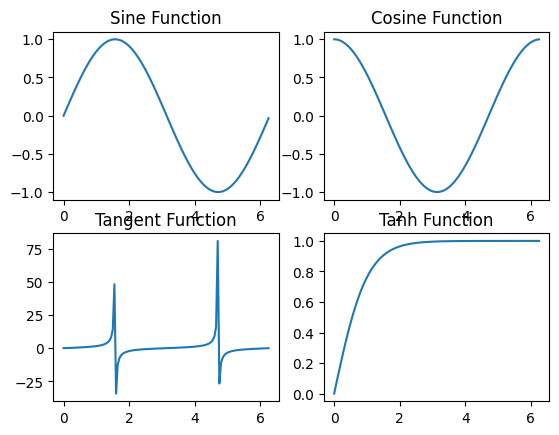

In [9]:
# Multi plot test
import math

# Get the angles from 0 to 2 pie (360 degree) in narray object
X = np.arange(0, math.pi*2, 0.05)

# Using built-in trigonometric function we can directly plot
# the given cosine wave for the given angles
Y1 = np.sin(X)
Y2 = np.cos(X)
Y3 = np.tan(X)
Y4 = np.tanh(X)

# Initialise the subplot function using number of rows and columns
figure, axis = mpl.subplots(2, 2)

# For Sine Function
axis[0, 0].plot(X, Y1)
axis[0, 0].set_title("Sine Function")

# For Cosine Function
axis[0, 1].plot(X, Y2)
axis[0, 1].set_title("Cosine Function")

# For Tangent Function
axis[1, 0].plot(X, Y3)
axis[1, 0].set_title("Tangent Function")

# For Tanh Function
axis[1, 1].plot(X, Y4)
axis[1, 1].set_title("Tanh Function")

# Combine all the operations and display
mpl.style.use('dark_background') # Because dark mode everything
mpl.show()


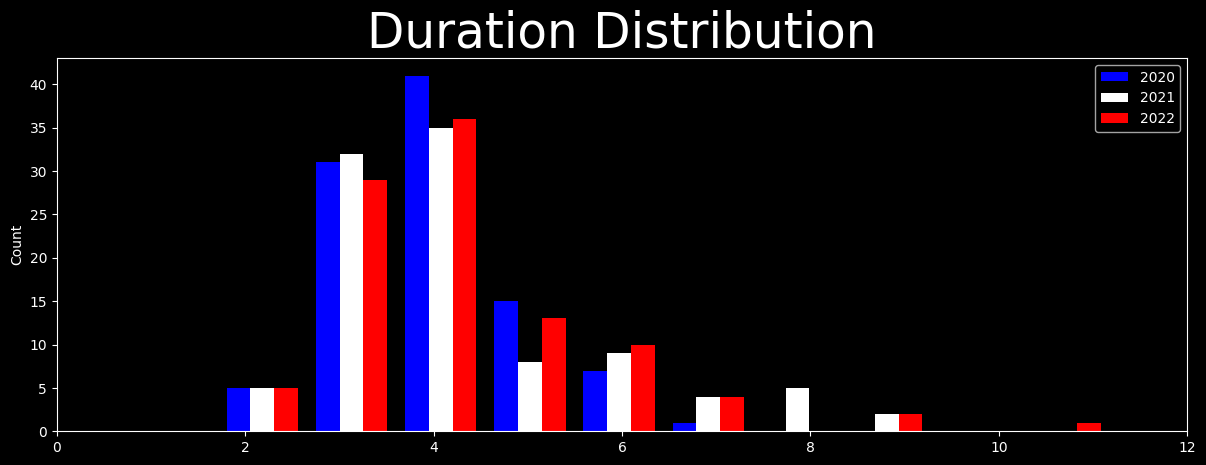

In [10]:
df20hist = df20['duration_m']
df21hist = df21['duration_m']
df22hist = df22['duration_m']

colors = ['b','w','r']

#plots the histogram
fig, ax1 = mpl.subplots()
mpl.title('Duration Distribution',
                fontstyle = "normal", 
                fontsize = 35, 
                fontfamily = "sans-serif")
ax1.hist([df20hist,df21hist,df22hist],color=colors)
ax1.set_xlim(0,12)
ax1.set_ylabel("Count")
legend = ["2020","2021", "2022"]
mpl.legend(legend)
mpl.tight_layout(rect=[0.1, 0.01, 2, 1])
# length, height, width , height
mpl.show()

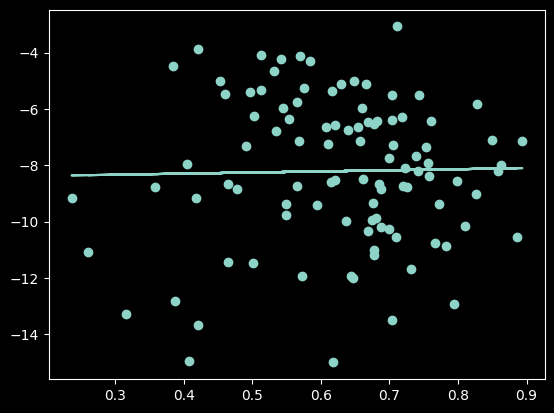

In [11]:
colours = ['b','r','']

fig, ax1 = mpl.subplots()

x = df20['danceability']
y = df20['loudness']

ax1.scatter(x,y)

a, b = np.polyfit(x, y, 1)

mpl.plot(x, a*x+b)

# mpl.show()


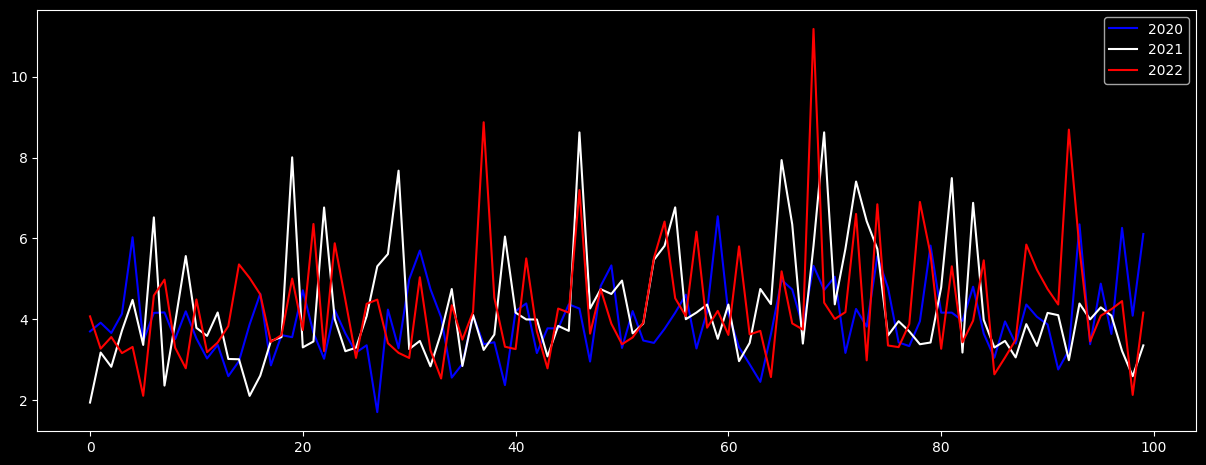

In [12]:
# Create a figure and axis
fig, ax = mpl.subplots()

# Plot the first line
ax.plot(df20hist, color="blue", label="2020")

# Plot the second line
ax.plot(df21hist, color="white", label="2021")

# Plot the 3rd line
ax.plot(df22hist, color="red", label="2022")

# Add a legend
ax.legend()
mpl.tight_layout(rect=[0.1, 0.01, 2, 1])

# Show the plot
mpl.show()

<!-- https://pandas-profiling.ydata.ai/docs/master/pages/getting_started/quickstart.html -->

In [20]:
# import matplotlib
# import numpy as np
# import pandas as pd
from pandas_profiling import ProfileReport

# profile = ProfileReport(df20, title="Pandas Profiling Report 2020")

# profile.to_notebook_iframe()


In [21]:
# profile = ProfileReport(df21, title="Pandas Profiling Report 2021")

# profile.to_notebook_iframe()

In [22]:
# profile = ProfileReport(df22, title="Pandas Profiling Report 2022")

# profile.to_notebook_iframe()

In [23]:
print('Mean Tempo')
print('2020 - ' + str(df20['tempo'].mean().round()))
print('2021 - ' + str(df21['tempo'].mean().round()))
print('2022 - ' + str(df22['tempo'].mean().round()))

print('\nMean Duration')
print('2020 - ' + str(df20['duration_m'].mean().round(2)))
print('2021 - ' + str(df21['duration_m'].mean().round(2)))
print('2022 - ' + str(df22['duration_m'].mean().round(2)))

print('\nMean Valence')
print('2020 - ' + str(df20['valence'].mean().round(2)))
print('2021 - ' + str(df21['valence'].mean().round(2)))
print('2022 - ' + str(df22['valence'].mean().round(2)))

mean_tempo = [df20['tempo'].mean().round(),df21['tempo'].mean().round(),df22['tempo'].mean().round()]

Mean Tempo
2020 - 121.0
2021 - 122.0
2022 - 127.0

Mean Duration
2020 - 3.98
2021 - 4.32
2022 - 4.34

Mean Valence
2020 - 0.53
2021 - 0.5
2022 - 0.45


In [24]:
#  2D array attempt to get the x axis as the year
# mean_tempo = [
#     [
#         '2020',
#         df20['tempo'].mean().round()
#     ],
#     [
#         '2021',
#         df21['tempo'].mean().round()
#     ],
#     [
#         '2022',
#         df22['tempo'].mean().round()
#     ]
# ]

mean_key = [df20['key'].mean().round(2),df21['key'].mean().round(2),df22['key'].mean().round(2)]
mean_tempo = [df20['tempo'].mean().round(2),df21['tempo'].mean().round(2),df22['tempo'].mean().round(2)]
mean_duration = [df20['duration_m'].mean().round(2),df21['duration_m'].mean().round(2),df22['duration_m'].mean().round(2)]
mean_danceability = [df20['danceability'].mean().round(2),df21['danceability'].mean().round(2),df22['danceability'].mean().round(2)]
mean_instrumentalness = [df20['instrumentalness'].mean().round(2),df21['instrumentalness'].mean().round(2),df22['instrumentalness'].mean().round(2)]

mean_instrumentalness

[0.08, 0.27, 0.2]

Text(0.5, 1.0, 'mean_danceability')

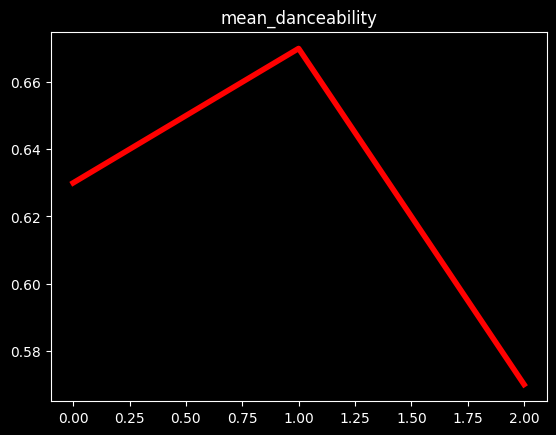

In [32]:
# Create a figure and axis
fig, ax = mpl.subplots()
linewidth = 4

ax.plot(mean_danceability, color="r",linewidth=linewidth)
ax.set_title("mean_danceability")

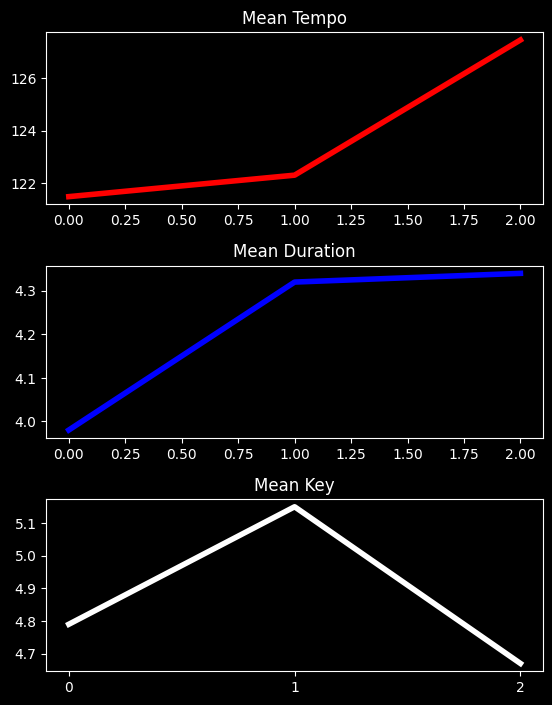

In [31]:
# Global variables

# Create a figure and axis
fig, ax = mpl.subplots(3,1)

ax[0].plot(mean_tempo, color="r",linewidth=linewidth)
ax[0].set_title("Mean Tempo")

ax[1].plot(mean_duration, color="b",linewidth=linewidth)
ax[1].set_title("Mean Duration")

ax[2].plot(mean_key, color="w",linewidth=linewidth)
ax[2].set_title("Mean Key")

mpl.xticks(np.arange(0,2.5,1))
mpl.tight_layout(rect=[0.1, 0.01, 1, 1.5])